# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Briyan Bayu Pangestu
- **Email:** bryanazza836@gmail.com
- **ID Dicoding:** bryan231
- **URL Streamlit:** https://analysis-with-python-7yuj7ghsxj6eezynqzucbx.streamlit.app/

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit terjadi?

- Pertanyaan 2: Pada musim apa penyewaan sepeda paling banyak terjadi?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Mengimpor library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Mengatur style untuk seaborn
sns.set_style('darkgrid')

**Penjelasan:**

Library seperti pandas digunakan untuk manipulasi data, matplotlib dan seaborn untuk visualisasi, serta os untuk mengatur jalur file secara dinamis pada dashboard.

## Data Wrangling

### Gathering Data

In [2]:
# Fungsi untuk memuat data
def load_data(filename):
    base_dir = os.getcwd()
    file_path = os.path.join(base_dir, "data", filename)
    return pd.read_csv(file_path)

In [3]:
# Memuat dataset
print("Memuat dataset...")
day_df = load_data('day.csv')
hour_df = load_data('hour.csv')

Memuat dataset...


**Penjelasan:**

Pada tahap ini, saya memuat dataset day.csv (data harian) dan hour.csv (data per jam) ke dalam DataFrame menggunakan pandas. Dataset ini berisi informasi penyewaan sepeda yang akan dianalisis lebih lanjut.

**Insight:**  
- Dataset day.csv dan hour.csv berhasil dimuat ke dalam DataFrame day_df dan hour_df.

### Assessing Data

In [4]:
# Menampilkan informasi dataset day_df
print("\nInformasi day_df:")
day_df.info()


Informasi day_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Menampilkan informasi dataset hour_df
print("\nInformasi hour_df:")
hour_df.info()


Informasi hour_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# Mengecek missing values di day_df
print("\nMissing values di day_df:")
print(day_df.isnull().sum())


Missing values di day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
# Mengecek missing values di hour_df
print("\nMissing values di hour_df:")
print(hour_df.isnull().sum())


Missing values di hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
# Mengecek duplikasi di day_df
print("\nJumlah duplikasi di day_df:", day_df.duplicated().sum())


Jumlah duplikasi di day_df: 0


In [9]:
# Mengecek duplikasi di hour_df
print("Jumlah duplikasi di hour_df:", hour_df.duplicated().sum())

Jumlah duplikasi di hour_df: 0


**Penjelasan:**

Saya mengevaluasi dataset untuk memahami struktur data, tipe data, adanya missing values, dan duplikasi. Langkah ini penting untuk memastikan kualitas data sebelum analisis.

**Insight:**  
- Tidak ada missing values di kedua dataset.  
- Tidak ada data duplikat di day_df maupun hour_df.  
- Kolom dteday perlu diubah menjadi tipe datetime, dan beberapa kolom kategori seperti season dapat diubah menjadi tipe category untuk efisiensi.

### Cleaning Data

In [10]:
# Mengubah tipe data 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [11]:
# Mengubah tipe data kolom kategori
category_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']
for col in category_columns:
    day_df[col] = day_df[col].astype('category')
    hour_df[col] = hour_df[col].astype('category')

In [12]:
# Mengganti nama kolom untuk keterbacaan
day_df.rename(columns={
    'yr': 'year', 'mnth': 'month', 'weekday': 'day_of_week',
    'weathersit': 'weather_situation', 'hum': 'humidity', 'cnt': 'total_count'
}, inplace=True)

hour_df.rename(columns={
    'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'weekday': 'day_of_week',
    'weathersit': 'weather_situation', 'hum': 'humidity', 'cnt': 'total_count'
}, inplace=True)

In [13]:
# Mapping untuk mengubah nilai kategori menjadi label yang lebih informatif
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_mapping)
hour_df['season'] = hour_df['season'].map(season_mapping)

month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
day_df['month'] = day_df['month'].map(month_mapping)
hour_df['month'] = hour_df['month'].map(month_mapping)

weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_df['day_of_week'] = day_df['day_of_week'].map(weekday_mapping)
hour_df['day_of_week'] = hour_df['day_of_week'].map(weekday_mapping)

weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
day_df['weather_situation'] = day_df['weather_situation'].map(weather_mapping)
hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_mapping)

year_mapping = {0: 2011, 1: 2012}
day_df['year'] = day_df['year'].map(year_mapping)
hour_df['year'] = hour_df['year'].map(year_mapping)

In [14]:
# Menambahkan kolom 'day_type' untuk membedakan hari kerja dan akhir pekan
def categorize_day(day):
    return 'Weekend' if day in ['Saturday', 'Sunday'] else 'Weekday'

day_df['day_type'] = day_df['day_of_week'].apply(categorize_day)
hour_df['day_type'] = hour_df['day_of_week'].apply(categorize_day)

**Penjelasan:**

Tahap ini melibatkan pembersihan data dengan mengubah tipe data, memperbaiki nama kolom, dan mengonversi nilai kategori menjadi label yang lebih mudah dibaca. Kolom day_type ditambahkan untuk analisis lebih lanjut.

**Insight:**

- Tipe data telah disesuaikan untuk analisis yang lebih efisien.  
- Nama kolom diperbaiki untuk keterbacaan.  
- Kolom day_type membedakan hari kerja dan akhir pekan.



## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
# Menampilkan statistik deskriptif untuk day_df
print("\nStatistik deskriptif day_df:")
print(day_df.describe(include='all'))


Statistik deskriptif day_df:
           instant               dteday season    year month  holiday  \
count   731.000000                  731    731   731.0   731    731.0   
unique         NaN                  NaN      4     2.0    12      2.0   
top            NaN                  NaN   Fall  2012.0   Jan      0.0   
freq           NaN                  NaN    188   366.0    62    710.0   
mean    366.000000  2012-01-01 00:00:00    NaN     NaN   NaN      NaN   
min       1.000000  2011-01-01 00:00:00    NaN     NaN   NaN      NaN   
25%     183.500000  2011-07-02 12:00:00    NaN     NaN   NaN      NaN   
50%     366.000000  2012-01-01 00:00:00    NaN     NaN   NaN      NaN   
75%     548.500000  2012-07-01 12:00:00    NaN     NaN   NaN      NaN   
max     731.000000  2012-12-31 00:00:00    NaN     NaN   NaN      NaN   
std     211.165812                  NaN    NaN     NaN   NaN      NaN   

       day_of_week  workingday weather_situation        temp       atemp  \
count          73

In [16]:
# Menampilkan statistik deskriptif untuk hour_df
print("\nStatistik deskriptif hour_df:")
print(hour_df.describe(include='all'))


Statistik deskriptif hour_df:
           instant                         dteday season     year  month  \
count   17379.0000                          17379  17379  17379.0  17379   
unique         NaN                            NaN      4      2.0     12   
top            NaN                            NaN   Fall   2012.0    May   
freq           NaN                            NaN   4496   8734.0   1488   
mean     8690.0000  2012-01-02 04:08:34.552045568    NaN      NaN    NaN   
min         1.0000            2011-01-01 00:00:00    NaN      NaN    NaN   
25%      4345.5000            2011-07-04 00:00:00    NaN      NaN    NaN   
50%      8690.0000            2012-01-02 00:00:00    NaN      NaN    NaN   
75%     13034.5000            2012-07-02 00:00:00    NaN      NaN    NaN   
max     17379.0000            2012-12-31 00:00:00    NaN      NaN    NaN   
std      5017.0295                            NaN    NaN      NaN    NaN   

                hour  holiday day_of_week    workingday 

**Penjelasan:**

Saya menggunakan describe() untuk mendapatkan gambaran distribusi data seperti rata-rata, median, dan standar deviasi, yang membantu dalam memahami karakteristik dataset.

**Insight:**
- Rata-rata penyewaan harian (total_count di day_df) adalah 4504, dengan maksimum 8714.  
- Rata-rata penyewaan per jam (total_count di hour_df) adalah 189, dengan maksimum 977.

## Visualization & Explanatory Analysis

**Pertanyaan 1:** Pada Jam Berapa Penyewaan Sepeda Paling Banyak dan Paling Sedikit Terjadi?



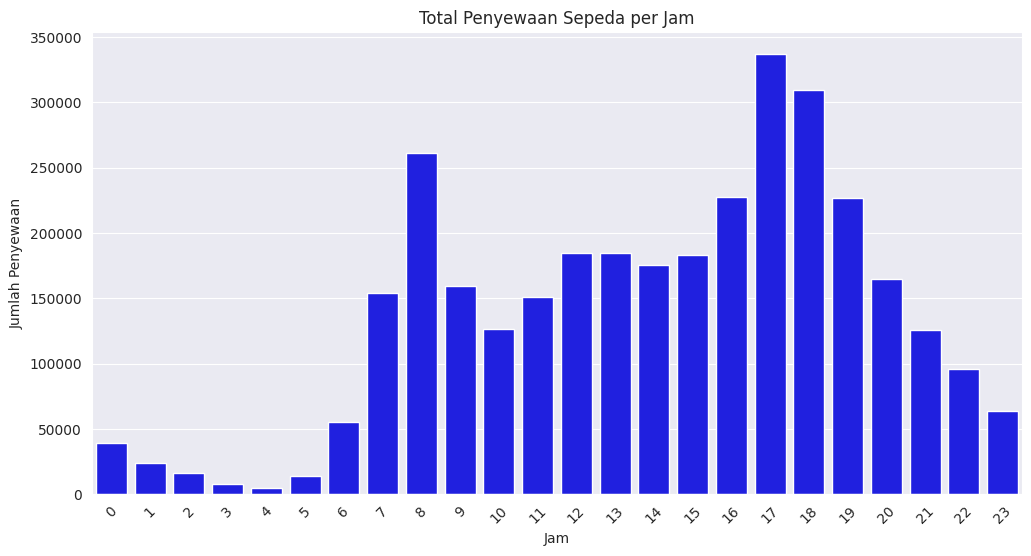

In [17]:
# Menghitung total penyewaan per jam
hourly_counts = hour_df.groupby('hour')['total_count'].sum().reset_index()
hourly_counts['hour'] = hourly_counts['hour'].astype(int)
hourly_counts.sort_values('hour', inplace=True)

# Visualisasi penyewaan per jam
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='total_count', data=hourly_counts, color='blue')
plt.title('Total Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

**Penjelasan:**

Saya menghitung total penyewaan per jam dan memvisualisasikannya menggunakan sns.barplot. Peringatan sebelumnya diatasi dengan menambahkan hue='hour' dan legend=False.

**Insight:**

- Jam Puncak: Penyewaan tertinggi terjadi pada jam 17:00, kemungkinan karena jam pulang kerja.  
- Jam Terendah: Penyewaan terendah terjadi pada jam 04:00, saat aktivitas masyarakat minim.



**Pertanyaan 2:** Pada Musim Apa Penyewaan Sepeda Paling Banyak Terjadi?

<ipython-input-18-675d237e9071>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_counts = day_df.groupby('season')['total_count'].sum().reset_index()


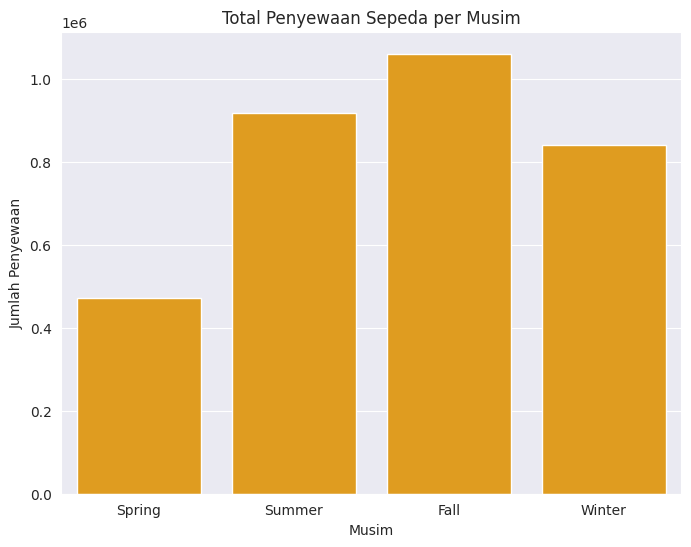

In [18]:
# Menghitung total penyewaan per musim
season_counts = day_df.groupby('season')['total_count'].sum().reset_index()

# Visualisasi penyewaan per musim
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='total_count', data=season_counts, color='orange')
plt.title('Total Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Penjelasan:**

Total penyewaan dihitung per musim dan divisualisasikan.

**Insight:**
Musim Terbanyak: Musim Fall (musim gugur) memiliki penyewaan tertinggi, mungkin karena cuaca yang nyaman.

## Analisis Lanjutan: Clustering manual berdasarkan rata-rata penyewaan per jam

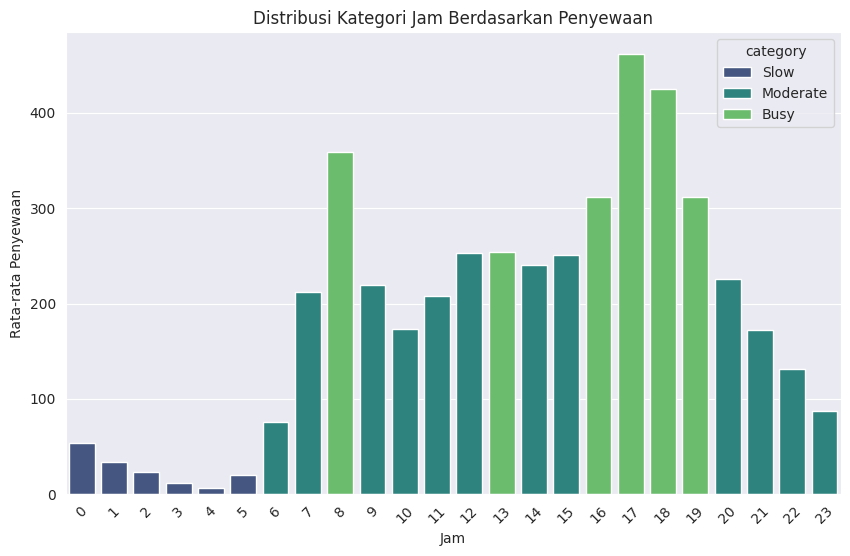

In [19]:
# Clustering manual berdasarkan rata-rata penyewaan per jam
hour_avg = hour_df.groupby('hour')['total_count'].mean().reset_index()
q1 = hour_avg['total_count'].quantile(0.25)
q3 = hour_avg['total_count'].quantile(0.75)

def categorize_hour(row):
    if row['total_count'] > q3:
        return 'Busy'
    elif row['total_count'] < q1:
        return 'Slow'
    else:
        return 'Moderate'

hour_avg['category'] = hour_avg.apply(categorize_hour, axis=1)

# Visualisasi distribusi kategori jam
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='total_count', data=hour_avg, hue='category', palette='viridis')
plt.title('Distribusi Kategori Jam Berdasarkan Penyewaan')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=45)
plt.show()

**Penjelasan:**
Saya menerapkan clustering manual untuk mengelompokkan jam berdasarkan jumlah penyewaan:  
- Jam Sibuk: Penyewaan > kuartil ketiga (Q3).  
- Jam Sepi: Penyewaan < kuartil pertama (Q1).  
- Jam Sedang: Penyewaan antara Q1 dan Q3.

**Insight:**
- Jam sibuk cenderung terjadi pada sore hari (sekitar 16:00-19:00).  
- Jam sepi dominan pada dini hari (00:00-06:00).

## Analisis Lanjutan: Pengaruh Cuaca dan Hari terhadap Penyewaan

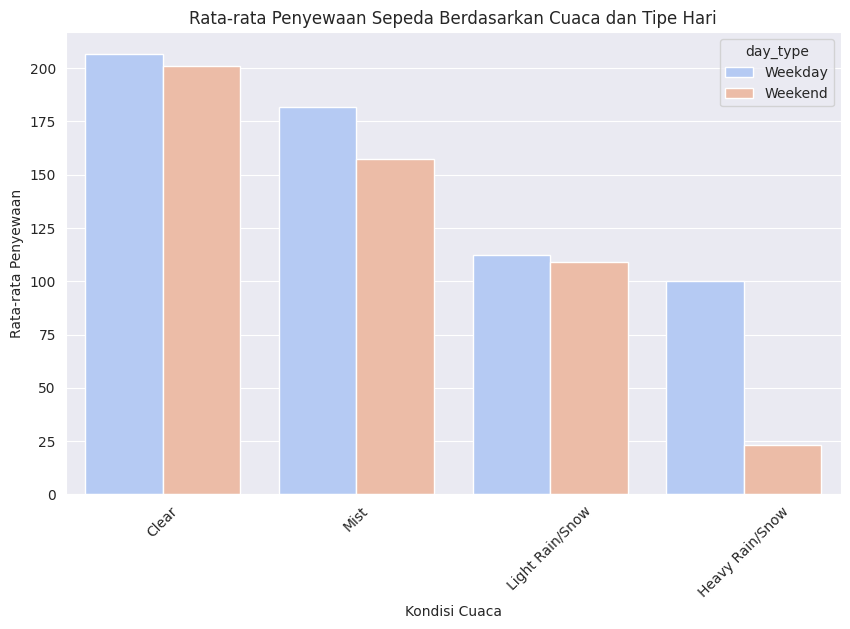

In [20]:
# Analisis: Pengaruh cuaca dan tipe hari terhadap penyewaan
weather_day_counts = hour_df.groupby(['weather_situation', 'day_type'], observed=True)['total_count'].mean().reset_index()

# Visualisasi pengaruh cuaca dan tipe hari
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_situation', y='total_count', hue='day_type', data=weather_day_counts, palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cuaca dan Tipe Hari')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=45)
plt.show()

**Penjelasan:**

Saya menganalisis kombinasi cuaca dan tipe hari (weekday/weekend) untuk menggali insight lebih dalam.

**Insight:**
- Penyewaan tertinggi terjadi pada cuaca cerah (Clear) di hari kerja.  
- Cuaca buruk (Heavy Rain/Snow) menurunkan penyewaan secara signifikan.

## Conclusion

**Kesimpulan Pertanyaan 1**

**Penyewaan Tertinggi:** Jam 17:00, diduga karena jam pulang kerja.  
**Penyewaan Terendah:** Jam 04:00, saat aktivitas rendah.  
**Rekomendasi:** Tambah stok sepeda pada jam sibuk dan kurangi pada jam sepi.

**Kesimpulan Pertanyaan 2**

**Musim Terbanyak:** Musim Fall memiliki penyewaan tertinggi.  
**Faktor:** Cuaca nyaman mendorong aktivitas bersepeda.  
**Rekomendasi:** Tingkatkan promosi di musim gugur.